### Business Problem Overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, we have analyzed customer-level data of a leading telecom firm and built predictive models to identify customers at high risk of churn and identify the main indicators of churn.




In [160]:
import pandas as pd 
import numpy as np

### Data Preparation

In [2]:
churn = pd.read_csv('telecom_churn_data.csv')

In [3]:
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
## Count of chruners based on condition - 
## Doing this first to ensure data cleaning dont remove rows with churn data if data is already imbalanced

In [6]:
churn[(((churn['total_ic_mou_9']==0) | (churn['total_og_mou_9']==0)) & ((churn['vol_2g_mb_9']==0) | (churn['vol_3g_mb_9']==0)))].shape

(13406, 226)

In [7]:
churn[~(((churn['total_ic_mou_9']==0) | (churn['total_og_mou_9']==0)) & ((churn['vol_2g_mb_9']==0) | (churn['vol_3g_mb_9']==0)))].shape

(86593, 226)

In [8]:
## add churn column
churn['churn'] = np.where((((churn['total_ic_mou_9']==0) | (churn['total_og_mou_9']==0)) & ((churn['vol_2g_mb_9']==0) | (churn['vol_3g_mb_9']==0))), 1, 0)

In [9]:
## Churn % 
churn['churn'].sum()/churn['churn'].count()

0.13406134061340613

In [10]:
## removing attributes related to Churn phase
churn = churn[churn.columns.drop(list(churn.filter(regex='_9')))]

In [11]:
## Next we will filter high value customers to ensure base data set aligns to problem in hand(i.e. focus high value cust)

In [12]:
list(churn.filter(regex='rech'))


['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8']

In [13]:
## derived column to find avg recharge in good phase
churn['avg_rech_amt_good_phase'] = (churn['total_rech_amt_6']+churn['total_rech_amt_7'])/2

In [14]:
## check 70 PC of avg recharge amount in good phase
churn['avg_rech_amt_good_phase'].describe([0.25,0.5,.7,.9,1])

count    99999.000000
mean       325.238792
std        370.833466
min          0.000000
25%        115.000000
50%        229.000000
70%        368.500000
90%        698.000000
100%     37762.500000
max      37762.500000
Name: avg_rech_amt_good_phase, dtype: float64

In [15]:
## filter by 70PC
churn[churn['avg_rech_amt_good_phase']>368.5].shape

(29979, 174)

In [16]:
## keep high value customers only
churn = churn[churn['avg_rech_amt_good_phase']>368.5]

In [17]:
churn.shape

(29979, 174)

In [18]:
## check Churn %again on high value customers
churn['churn'].sum()/churn['churn'].count()

0.10150438640381601

### Data Cleaning

In [19]:
##columns with nulls
churn.columns[churn.isnull().sum()>0]

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_7', 'last_date_of_month_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       ...
       'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8'],
      dtype='object', length=125)

In [20]:
## check data types
churn.select_dtypes(include=['object']).shape

(29979, 9)

In [21]:
##nice to see complete columns while o/p
pd.set_option('display.max_rows', None)

In [22]:
## total churns
churn['churn'].sum()

3043

In [23]:
## rows having null and churn. so can not drop rows with nulls 
churn[churn.isnull().any(axis=1)]['churn'].sum()

2791

In [24]:
churn.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou                114
std_og_t2o_mou                114
loc_ic_t2o_mou                114
last_date_of_month_6            0
last_date_of_month_7           31
last_date_of_month_8          157
arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                   316
onnet_mou_7                   303
onnet_mou_8                   938
offnet_mou_6                  316
offnet_mou_7                  303
offnet_mou_8                  938
roam_ic_mou_6                 316
roam_ic_mou_7                 303
roam_ic_mou_8                 938
roam_og_mou_6                 316
roam_og_mou_7                 303
roam_og_mou_8                 938
loc_og_t2t_mou_6              316
loc_og_t2t_mou_7              303
loc_og_t2t_mou_8              938
loc_og_t2m_mou_6              316
loc_og_t2m_mou_7              303
loc_og_t2m_mou_8              938
loc_og_t2f_mou

In [25]:
## reset
pd.set_option('display.max_rows', 10)

In [26]:
## seems most nulls are with data recharge and imputing with 0 makes sense if no data

In [27]:
churn['total_rech_data_6'] = churn['total_rech_data_6'].apply(lambda x : 0 if x!=x else x)
churn['total_rech_data_7'] = churn['total_rech_data_7'].apply(lambda x : 0 if x!=x else x)
churn['total_rech_data_8'] = churn['total_rech_data_8'].apply(lambda x : 0 if x!=x else x)
churn['max_rech_data_6'] = churn['max_rech_data_6'].apply(lambda x : 0 if x!=x else x)
churn['max_rech_data_7'] = churn['max_rech_data_7'].apply(lambda x : 0 if x!=x else x)
churn['max_rech_data_8'] = churn['max_rech_data_8'].apply(lambda x : 0 if x!=x else x)
churn['count_rech_2g_6'] = churn['count_rech_2g_6'].apply(lambda x : 0 if x!=x else x)
churn['count_rech_2g_7'] = churn['count_rech_2g_7'].apply(lambda x : 0 if x!=x else x)
churn['count_rech_2g_8'] = churn['count_rech_2g_8'].apply(lambda x : 0 if x!=x else x)
churn['count_rech_3g_6'] = churn['count_rech_3g_6'].apply(lambda x : 0 if x!=x else x)
churn['count_rech_3g_7'] = churn['count_rech_3g_7'].apply(lambda x : 0 if x!=x else x)
churn['total_rech_data_8'] = churn['total_rech_data_8'].apply(lambda x : 0 if x!=x else x)
churn['count_rech_3g_8'] = churn['count_rech_3g_8'].apply(lambda x : 0 if x!=x else x)
churn['av_rech_amt_data_6'] = churn['av_rech_amt_data_6'].apply(lambda x : 0 if x!=x else x)
churn['av_rech_amt_data_7'] = churn['av_rech_amt_data_7'].apply(lambda x : 0 if x!=x else x)
churn['av_rech_amt_data_8'] = churn['av_rech_amt_data_8'].apply(lambda x : 0 if x!=x else x)
churn['count_rech_2g_7'] = churn['count_rech_2g_7'].apply(lambda x : 0 if x!=x else x)
churn['count_rech_2g_8'] = churn['count_rech_2g_8'].apply(lambda x : 0 if x!=x else x)
churn['arpu_3g_6'] = churn['arpu_3g_6'].apply(lambda x : 0 if x!=x else x)
churn['arpu_3g_7'] = churn['arpu_3g_7'].apply(lambda x : 0 if x!=x else x)
churn['arpu_3g_8'] = churn['arpu_3g_8'].apply(lambda x : 0 if x!=x else x)
churn['arpu_2g_6'] = churn['arpu_2g_6'].apply(lambda x : 0 if x!=x else x)
churn['arpu_2g_7'] = churn['arpu_2g_7'].apply(lambda x : 0 if x!=x else x)
churn['arpu_2g_8'] = churn['arpu_2g_8'].apply(lambda x : 0 if x!=x else x)
churn['night_pck_user_6'] = churn['night_pck_user_6'].apply(lambda x : 0 if x!=x else x)
churn['night_pck_user_7'] = churn['night_pck_user_7'].apply(lambda x : 0 if x!=x else x)
churn['night_pck_user_8'] = churn['night_pck_user_8'].apply(lambda x : 0 if x!=x else x)
churn['fb_user_6'] = churn['fb_user_6'].apply(lambda x : 0 if x!=x else x)
churn['fb_user_7'] = churn['fb_user_7'].apply(lambda x : 0 if x!=x else x)
churn['fb_user_8'] = churn['fb_user_8'].apply(lambda x : 0 if x!=x else x)


In [28]:
## check data types.. 
churn.select_dtypes(include=['object'])

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
7,6/30/2014,7/31/2014,8/31/2014,6/27/2014,7/25/2014,8/26/2014,NaN,NaN,NaN
8,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/31/2014,8/30/2014,NaN,7/31/2014,8/23/2014
13,6/30/2014,7/31/2014,8/31/2014,6/20/2014,7/22/2014,8/30/2014,NaN,NaN,8/30/2014
16,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/31/2014,8/14/2014,NaN,NaN,NaN
17,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/30/2014,8/25/2014,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
99970,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/29/2014,8/23/2014,6/26/2014,7/27/2014,NaN
99974,6/30/2014,7/31/2014,8/31/2014,6/29/2014,7/27/2014,8/23/2014,NaN,NaN,NaN
99986,6/30/2014,7/31/2014,8/31/2014,6/20/2014,7/28/2014,8/18/2014,6/17/2014,7/18/2014,8/14/2014
99988,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/28/2014,8/29/2014,NaN,7/26/2014,8/23/2014


### Feature Engineering

In [29]:
##derived colum to calculate diff from last date of month from recharge date. It may give sense of trend in action month
churn['diff_recharge_days_from_monthend_6'] = pd.to_datetime(churn['last_date_of_month_6']).apply(lambda x:x.day)-pd.to_datetime(churn['date_of_last_rech_6']).apply(lambda x:x.day)

In [30]:
churn['diff_recharge_days_from_monthend_6'].head(5)

7      3.0
8      5.0
13    10.0
16     0.0
17     0.0
Name: diff_recharge_days_from_monthend_6, dtype: float64

In [31]:
churn['diff_recharge_days_from_monthend_7'] = pd.to_datetime(churn['last_date_of_month_7']).apply(lambda x:x.day)-pd.to_datetime(churn['date_of_last_rech_7']).apply(lambda x:x.day)
churn['diff_recharge_days_from_monthend_8'] = pd.to_datetime(churn['last_date_of_month_8']).apply(lambda x:x.day)-pd.to_datetime(churn['date_of_last_rech_8']).apply(lambda x:x.day)

##derived colum to calculate diff from last date of month from recharge date. It may give sense of trend in action month
churn['diff_rechargedata_days_from_monthend_6'] = pd.to_datetime(churn['last_date_of_month_6']).apply(lambda x:x.day)-pd.to_datetime(churn['date_of_last_rech_data_6']).apply(lambda x:x.day)
churn['diff_rechargedata_days_from_monthend_7'] = pd.to_datetime(churn['last_date_of_month_7']).apply(lambda x:x.day)-pd.to_datetime(churn['date_of_last_rech_data_7']).apply(lambda x:x.day)
churn['diff_rechargedata_days_from_monthend_8'] = pd.to_datetime(churn['last_date_of_month_8']).apply(lambda x:x.day)-pd.to_datetime(churn['date_of_last_rech_data_8']).apply(lambda x:x.day)

In [32]:
## dropping date column as dont find useful for analysis and has large number of nulls. 
## we already have number of recharges to get sense of trend
churn.drop(columns=churn.select_dtypes(include=['object']).columns, axis=1, inplace=True)

In [33]:
## total churns
churn['churn'].sum()

3043

In [34]:
## rows having null and churn. Reduced after imputation but still can not drop
churn[churn.isnull().any(axis=1)]['churn'].sum()

2791

In [35]:
##nice to see complete columns while o/p
pd.set_option('display.max_rows', None)

In [36]:
churn.isnull().sum()

mobile_number                                 0
circle_id                                     0
loc_og_t2o_mou                              114
std_og_t2o_mou                              114
loc_ic_t2o_mou                              114
arpu_6                                        0
arpu_7                                        0
arpu_8                                        0
onnet_mou_6                                 316
onnet_mou_7                                 303
onnet_mou_8                                 938
offnet_mou_6                                316
offnet_mou_7                                303
offnet_mou_8                                938
roam_ic_mou_6                               316
roam_ic_mou_7                               303
roam_ic_mou_8                               938
roam_og_mou_6                               316
roam_og_mou_7                               303
roam_og_mou_8                               938
loc_og_t2t_mou_6                        

In [37]:
##reset
pd.set_option('display.max_rows', 10)

In [38]:
churn.select_dtypes(include=['float','int']).shape

(29979, 171)

In [39]:
## impute all remaining missing values with 0 assuming no entry means user not used particular service. Could have used median
churn.fillna(0,inplace=True)

In [40]:
## no missing values now
churn.isnull().sum().sum()

0

In [41]:
churn.shape

(29979, 171)

In [42]:
##reset
pd.set_option('display.max_columns', None)

In [43]:
##checking disribution 
churn.describe([0.25,0.5,0.75,0.9,0.95,0.99])

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,avg_rech_amt_good_phase,diff_recharge_days_from_monthend_6,diff_recharge_days_from_monthend_7,diff_recharge_days_from_monthend_8,diff_rechargedata_days_from_monthend_6,diff_rechargedata_days_from_monthend_7,diff_rechargedata_days_from_monthend_8
count,2.997900e+04,29979.0,29979.0,29979.0,29979.0,29979.000000,29979.000000,29979.000000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.0,29979.0,29979.0,29979.000000,29979.000000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.0,29979.0,29979.0,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00

In [44]:
##dropping columns with 0 standard deviation 
churn = churn.loc[:, churn.std() !=0]

In [45]:
churn.shape

(29979, 161)

In [46]:
##dropping columns like mobile number
churn.drop(columns=['mobile_number'], axis=1,inplace=True)

In [47]:
##dropping columns like mobile number
churn.drop(columns=['avg_rech_amt_good_phase'], axis=1,inplace=True)

In [48]:
##dropping sep_vbc_3g column related to churn phase
churn.drop(columns=['sep_vbc_3g'], axis=1,inplace=True)

In [49]:
churn.shape

(29979, 158)

In [50]:
# total churns
churn['churn'].sum()

3043

In [51]:
churn.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn',
       'diff_recharge_days_from_monthend_6',
       'diff_recharge_days_from_monthend_7',
       'diff_recharge_days_from_monthend_8',
       'diff_rechargedata_days_from_monthend_6',
       'diff_rechargedata_days_from_monthend_7',
       'diff_rechargedata_days_from_monthend_8'],
      dtype='object', length=158)

### Data Visualization and EDA

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

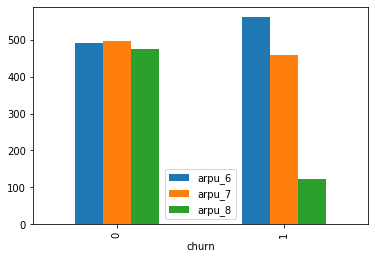

In [53]:
## average revenue per user drops significantly in action month for churners
churn.groupby(['churn'])[['arpu_6','arpu_7','arpu_8']].median().plot.bar()

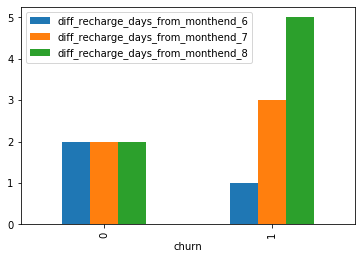

In [54]:
## difference of recharge date from month end increases for future churners i.e. if recharge is not done per good months 
## then time for action
churn.groupby(['churn'])[['diff_recharge_days_from_monthend_6','diff_recharge_days_from_monthend_7','diff_recharge_days_from_monthend_8']].median().plot.bar()

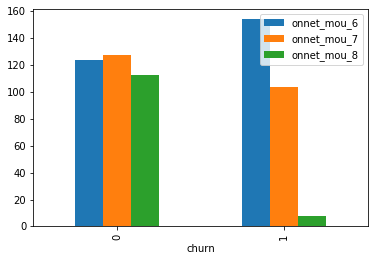

In [55]:
## number of calls drops significantly in action month for future churners
churn.groupby(['churn'])[['onnet_mou_6','onnet_mou_7','onnet_mou_8']].median().plot.bar()

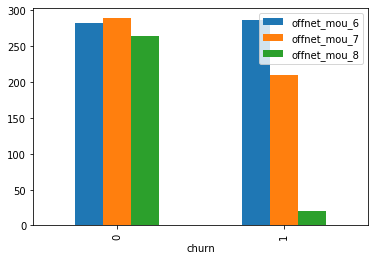

In [56]:
## number of calls drops significantly in action month for future churners
churn.groupby(['churn'])[['offnet_mou_6','offnet_mou_7','offnet_mou_8']].median().plot.bar()

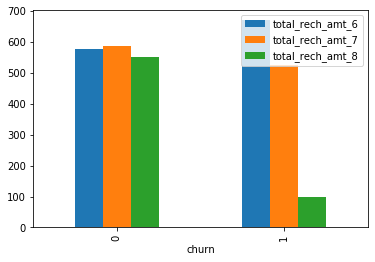

In [57]:
## recharge amount drops significantly in action month for future churners
churn.groupby(['churn'])[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']].median().plot.bar()

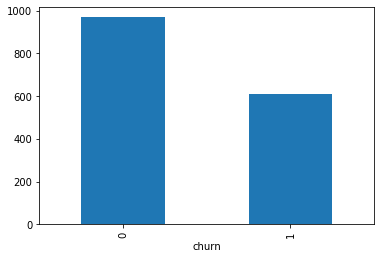

In [58]:
## Churners tend to spend less time on n/w
churn.groupby(['churn'])['aon'].median().plot.bar()

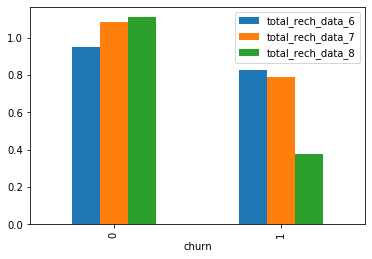

In [59]:
## data recharge drops significantly in action month for future churners
churn.groupby(['churn'])[['total_rech_data_6','total_rech_data_7','total_rech_data_8']].mean().plot.bar()

In [60]:
##reset
pd.set_option('display.max_rows', 15)
##checking disribution 
churn.describe([0.05,0.1,0.25,0.9,0.95,0.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,diff_recharge_days_from_monthend_6,diff_recharge_days_from_monthend_7,diff_recharge_days_from_monthend_8,diff_rechargedata_days_from_monthend_6,diff_rechargedata_days_from_monthend_7,diff_rechargedata_days_from_monthend_8
count,29979.000000,29979.000000,29979.000000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00

**Data set has outliers as seen in difference between 99 percentile and max. Plan to use tree based classifier so 
proceeding without action for now**

**Check corr-relation between independent variables**

In [61]:
## check Co-relation to o/p variable..
corr_matrix = churn.corr().abs()

In [62]:
## check vars >0.7 corr
high_corr_var=np.where(corr_matrix>0.7)

In [63]:
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y ]

In [64]:
## Many variables have high correlation amonst each other.
high_corr_var

[('arpu_6', 'total_rech_amt_6'),
 ('arpu_7', 'arpu_8'),
 ('arpu_7', 'total_rech_amt_7'),
 ('arpu_7', 'total_rech_amt_8'),
 ('arpu_8', 'arpu_7'),
 ('arpu_8', 'total_rech_amt_7'),
 ('arpu_8', 'total_rech_amt_8'),
 ('onnet_mou_6', 'onnet_mou_7'),
 ('onnet_mou_6', 'std_og_t2t_mou_6'),
 ('onnet_mou_7', 'onnet_mou_6'),
 ('onnet_mou_7', 'onnet_mou_8'),
 ('onnet_mou_7', 'std_og_t2t_mou_7'),
 ('onnet_mou_7', 'total_og_mou_7'),
 ('onnet_mou_8', 'onnet_mou_7'),
 ('onnet_mou_8', 'std_og_t2t_mou_8'),
 ('onnet_mou_8', 'total_og_mou_8'),
 ('offnet_mou_6', 'std_og_t2m_mou_6'),
 ('offnet_mou_6', 'total_og_mou_6'),
 ('offnet_mou_7', 'offnet_mou_8'),
 ('offnet_mou_7', 'std_og_t2m_mou_7'),
 ('offnet_mou_7', 'total_og_mou_7'),
 ('offnet_mou_8', 'offnet_mou_7'),
 ('offnet_mou_8', 'std_og_t2m_mou_8'),
 ('offnet_mou_8', 'total_og_mou_8'),
 ('loc_og_t2t_mou_6', 'loc_og_t2t_mou_7'),
 ('loc_og_t2t_mou_6', 'loc_og_mou_6'),
 ('loc_og_t2t_mou_7', 'loc_og_t2t_mou_6'),
 ('loc_og_t2t_mou_7', 'loc_og_t2t_mou_8'),
 ('lo

**Number of columns are large with collinearity, we will proceed with PCA for dimensionality reduction followed by Random forest algorithm**

## Churn Prediction Model

### Feature Standardisation

In [65]:
y = churn.pop('churn')

In [66]:
X = churn

In [67]:
X.shape

(29979, 157)

In [68]:
## using stratified train/test split as we have unbalanced data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.20,random_state=100)

In [69]:
## standardize features before PCA
from sklearn import preprocessing
X_scaler = preprocessing.StandardScaler().fit(X_train)
Xtrain = X_scaler.transform(X_train) 

In [70]:
Xtest = X_scaler.transform(X_test) 

### Applying PCA

In [71]:
from sklearn.decomposition import PCA

In [72]:
pca = PCA(random_state=42)

In [73]:
pca.fit(Xtrain)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [74]:
pca.components_

array([[ 5.29627175e-02,  5.78830320e-02,  6.11114188e-02, ...,
         9.32988335e-02,  8.68425374e-02,  8.45698793e-02],
       [ 1.34493748e-01,  1.51302748e-01,  1.54304243e-01, ...,
        -7.31009255e-03, -4.60668186e-03,  5.66541788e-03],
       [ 1.18833735e-01,  1.50273220e-01,  1.34414926e-01, ...,
        -2.84695848e-02, -2.00562868e-02, -8.75683365e-03],
       ...,
       [-0.00000000e+00,  1.47163222e-16, -1.39827225e-16, ...,
        -3.36828217e-17,  1.18803758e-17, -9.13899943e-19],
       [ 0.00000000e+00, -2.72588606e-16,  2.03037430e-16, ...,
         5.51625746e-17, -1.14034308e-17, -2.64998582e-19],
       [-0.00000000e+00,  1.04856580e-16, -8.18443914e-17, ...,
         6.20613500e-17,  1.71932311e-17,  5.42802587e-17]])

In [75]:
pca.explained_variance_ratio_

array([1.16875030e-01, 7.67174508e-02, 6.70781562e-02, 5.20544166e-02,
       3.74581757e-02, 3.23565012e-02, 2.92486387e-02, 2.77320646e-02,
       2.33875743e-02, 2.20072074e-02, 2.07813576e-02, 1.98188322e-02,
       1.80730410e-02, 1.75472191e-02, 1.67721197e-02, 1.65639832e-02,
       1.56077023e-02, 1.46037445e-02, 1.37803132e-02, 1.28022075e-02,
       1.20794995e-02, 1.17560226e-02, 1.10980777e-02, 1.04059443e-02,
       1.00679406e-02, 9.42729443e-03, 8.77632765e-03, 8.60419897e-03,
       8.09663367e-03, 7.75475344e-03, 7.58496892e-03, 7.54864579e-03,
       7.34580884e-03, 7.17672270e-03, 6.60047920e-03, 6.24260052e-03,
       6.15301215e-03, 5.98060033e-03, 5.92332411e-03, 5.79115635e-03,
       5.77531505e-03, 5.72382622e-03, 5.38624033e-03, 5.33410730e-03,
       5.21152035e-03, 5.11071075e-03, 5.03494224e-03, 4.87971507e-03,
       4.73190465e-03, 4.64284190e-03, 4.59611658e-03, 4.53389792e-03,
       4.27276748e-03, 4.25856695e-03, 4.08833190e-03, 3.91254826e-03,
      

In [76]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

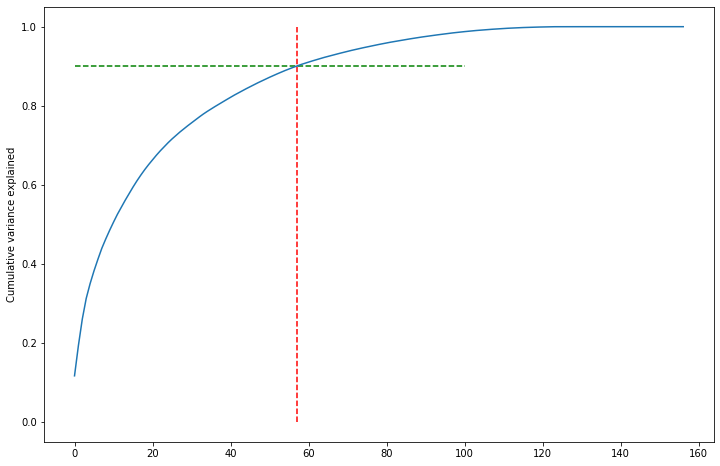

In [77]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=57, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.90, xmax=100, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

**Perform PCA with 57 components**

In [78]:
from sklearn.decomposition import IncrementalPCA

In [79]:
pca_final = IncrementalPCA(n_components=57)

In [80]:
X_train_pca = pca_final.fit_transform(Xtrain)

In [81]:
X_train_pca.shape

(23983, 57)

In [82]:
corrmat = np.corrcoef(X_train_pca.transpose())

In [83]:
corrmat.shape

(57, 57)

In [84]:
X_test_pca = pca_final.transform(Xtest)
X_test_pca.shape

(5996, 57)

In [85]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest. Specifying class weight to indicate random forest on unbalanced data
rfc = RandomForestClassifier(class_weight='balanced_subsample', random_state=42)

In [86]:
# fit
rfc.fit(X_train_pca,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [87]:
# Making predictions
predictions = rfc.predict(X_test_pca)

In [88]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, recall_score

In [89]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5387
           1       0.64      0.18      0.28       609

    accuracy                           0.91      5996
   macro avg       0.78      0.58      0.62      5996
weighted avg       0.89      0.91      0.88      5996



In [90]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[5327   60]
 [ 500  109]]


In [91]:
## both F1 score and recall are low on test data indicating overfit so hyperparam tuning needed
print(recall_score(y_test,predictions))

0.17898193760262726


**recall(detection rate) are low on test data so hyperparam tuning needed**

### Hyperparameter Tuning

In [92]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

- **Classweight passed to Random forest to indicate presence of imbalance data.**
- **Stratified K fold used to have equal ratio of classes across folds**
- **F1(preferred for unbalanced data) and recall score(detection rate more imp for this assignment) can be used as evaluation matrix. Tried both and detection rate was comparable via gridsearch CV so used F1 as final matrix. It gave less false positive count with similar false negetives.**



**Tune Max Depth**

In [93]:

# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits=5)

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced_subsample', random_state=42)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="f1",n_jobs = -1,return_train_score=True)
rf.fit(X_train_pca, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced_subsample',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                         

In [94]:

# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()
rf.best_params_

{'max_depth': 7}

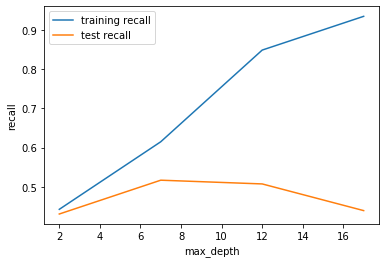

In [95]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("recall")
plt.legend()
plt.show()



**Tune Number of estimators**

In [96]:
from sklearn.model_selection import RandomizedSearchCV

# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits=5)

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model
rf = RandomForestClassifier(max_depth=7,class_weight='balanced_subsample', random_state=42)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="f1",n_jobs = -1,return_train_score=True)
rf.fit(X_train_pca, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced_subsample',
                                              criterion='gini', max_depth=7,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                            

In [97]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()
rf.best_params_

{'n_estimators': 1300}

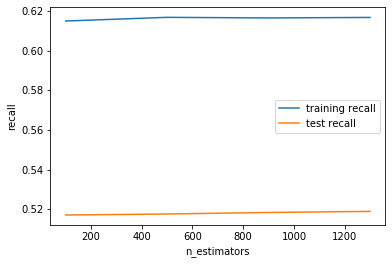

In [98]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("n_estimators")
plt.ylabel("recall")
plt.legend()
plt.show()




**Tune Max features**

In [99]:


from sklearn.model_selection import RandomizedSearchCV

# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits=5)

# parameters to build the model on
parameters = {'max_features': [5, 10, 20, 30, 40, 50]}

# instantiate the model
rf = RandomForestClassifier(max_depth=7,class_weight='balanced_subsample', random_state=42)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="f1",n_jobs = -1,return_train_score=True)
rf.fit(X_train_pca, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced_subsample',
                                              criterion='gini', max_depth=7,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                            

In [100]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()
rf.best_params_

{'max_features': 20}

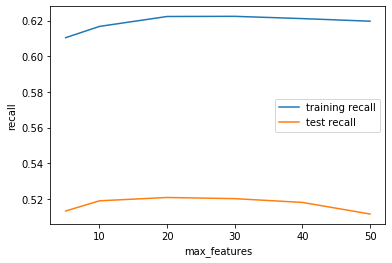

In [101]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_features")
plt.ylabel("recall")
plt.legend()
plt.show()



**Tune min sample leaf**

In [102]:
from sklearn.model_selection import RandomizedSearchCV

# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits=5)

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}



# instantiate the model
rf = RandomForestClassifier(class_weight='balanced_subsample', random_state=42)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="f1",n_jobs = -1,return_train_score=True)
rf.fit(X_train_pca, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced_subsample',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                         

In [103]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()
rf.best_params_

{'min_samples_leaf': 100}

**Tune Min sample split**

In [104]:
from sklearn.model_selection import RandomizedSearchCV

# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits=5)

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}



# instantiate the model
rf = RandomForestClassifier(class_weight='balanced_subsample', random_state=42)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="f1",n_jobs = -1,return_train_score=True)
rf.fit(X_train_pca, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced_subsample',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                         

In [105]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()
rf.best_params_


{'min_samples_split': 200}

**Final Model**

In [106]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=7,
                             max_features=40,
                             n_estimators=100,
                             min_samples_leaf=100,
                             min_samples_split=200,
                             class_weight='balanced_subsample',n_jobs=-1, random_state=42)

In [107]:
# fit
rfc.fit(X_train_pca,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=7, max_features=40, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=100,
                       min_samples_split=200, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [108]:
# predict
predictions = rfc.predict(X_test_pca)

In [109]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      5387
           1       0.36      0.80      0.49       609

    accuracy                           0.83      5996
   macro avg       0.66      0.82      0.70      5996
weighted avg       0.91      0.83      0.86      5996



In [110]:
print(confusion_matrix(y_test,predictions))

[[4507  880]
 [ 124  485]]


**Getting 0.80 detection rate for Churners. Overall f1 score is 0.86**

#### Attempted XGBoost in different notebook and got below. Since recall for churners was 0.41 so decided to go with random forest.



                   precision    recall  f1-score   support

           0       0.94      0.97      0.95      5387
           1       0.62      0.41      0.49       609

    accuracy                           0.91      5996
   macro avg       0.78      0.69      0.72      5996
weighted avg       0.90      0.91      0.91      5996

## Identifying important churn indicators and business recommendation

**Plan to use Logisitic regression model**


- Need to handle multi-collinearity 
- Need to handle outliers

**Outlier treatment**

In [111]:
## X has features and y has target variable
churn = pd.concat([X,y],axis=1)

In [112]:
churn.describe([0.05,0.1,0.25,0.9,0.95,0.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,diff_recharge_days_from_monthend_6,diff_recharge_days_from_monthend_7,diff_recharge_days_from_monthend_8,diff_rechargedata_days_from_monthend_6,diff_rechargedata_days_from_monthend_7,diff_rechargedata_days_from_monthend_8,churn
count,29979.000000,29979.000000,29979.000000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00

In [113]:
churn.shape

(29979, 158)

In [114]:
## Outlier removal
lst = churn.columns
def drop_outliers(x):
    list = []
    for col in lst:
        Q1 = x[col].quantile(0)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1)) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

churn = drop_outliers(churn)

In [115]:
churn.shape

(26320, 158)

In [116]:
churn['churn'].sum()

2674

**Multi-Collinearity check**

In [117]:
## check Co-relation between independent vars
corr_matrix = X.corr().abs()

In [118]:
## check vars >0.9 corr
high_corr_var=np.where(corr_matrix>0.9)

In [119]:
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y ]

In [120]:
## will solve with VIF during model tuning
high_corr_var

[('arpu_6', 'total_rech_amt_6'),
 ('arpu_7', 'total_rech_amt_7'),
 ('arpu_8', 'total_rech_amt_8'),
 ('isd_og_mou_6', 'isd_og_mou_7'),
 ('isd_og_mou_6', 'isd_og_mou_8'),
 ('isd_og_mou_7', 'isd_og_mou_6'),
 ('isd_og_mou_7', 'isd_og_mou_8'),
 ('isd_og_mou_8', 'isd_og_mou_6'),
 ('isd_og_mou_8', 'isd_og_mou_7'),
 ('total_rech_amt_6', 'arpu_6'),
 ('total_rech_amt_7', 'arpu_7'),
 ('total_rech_amt_8', 'arpu_8'),
 ('count_rech_2g_6', 'sachet_2g_6'),
 ('count_rech_2g_7', 'sachet_2g_7'),
 ('count_rech_2g_8', 'sachet_2g_8'),
 ('arpu_3g_6', 'arpu_2g_6'),
 ('arpu_3g_7', 'arpu_2g_7'),
 ('arpu_3g_8', 'arpu_2g_8'),
 ('arpu_2g_6', 'arpu_3g_6'),
 ('arpu_2g_7', 'arpu_3g_7'),
 ('arpu_2g_8', 'arpu_3g_8'),
 ('sachet_2g_6', 'count_rech_2g_6'),
 ('sachet_2g_7', 'count_rech_2g_7'),
 ('sachet_2g_8', 'count_rech_2g_8')]

**Logistic regression Model building**

In [121]:
y = churn.pop('churn')
X = churn
## using stratified train/test split as we have unbalanced data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.20,random_state=100)
## standardize features 
from sklearn import preprocessing
X_scaler = preprocessing.StandardScaler().fit(X_train)
X_train[X_train.columns] = X_scaler.transform(X_train) 
X_test[X_test.columns] = X_scaler.transform(X_test) 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [122]:
import statsmodels.api as sm

In [123]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21056
Model:                            GLM   Df Residuals:                    20912
Model Family:                Binomial   Df Model:                          143
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4138.1
Date:                Mon, 02 Nov 2020   Deviance:                       8276.3
Time:                        01:16:51   Pearson chi2:                 6.62e+04
No. Iterations:                    43                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -3.6846      0.061    -60.479      0.000      -3.804      -3.565
arpu_6                                     0.1726      0.091      1.894      0.058      -0.006       0.351
arpu_7                                    -0.0613      0.096     -0.637      0.524      -0.250       0.127
arpu_8                                     0.2088      0.137      1.529      0.126      -0.059       0.476
onnet_mou_6                                3.9293      3.890      1.010      0.312      -3.695      11.554
onnet_mou_7                               -2.1145      2.903     -0.728      0.466      -7.804       3.575
onnet_mou_8                               -0.7396      3.098     -0.239      0.811      -6.812       5.332
offnet_mou_6                               4.4893      4.085      1.099      0.272      -3.516      12.495
offnet_mou_7                              -1.3740      3.038     -0.452      0.651      -7.329       4.581
offnet_mou_8                              -2.0737      3.238     -0.640      0.522      -8.420       4.273
roam_ic_mou_6                             -0.0290      0.045     -0.645      0.519      -0.117       0.059
roam_ic_mou_7                              0.0952      0.042      2.292      0.022       0.014       0.177
roam_ic_mou_8                             -0.0721      0.035     -2.060      0.039      -0.141      -0.003
roam_og_mou_6                             -0.8412      0.827     -1.017      0.309      -2.462       0.780
roam_og_mou_7                              0.2780      0.459      0.605      0.545      -0.622       1.178
roam_og_mou_8                              0.2727      0.481      0.567      0.571      -0.670       1.216
loc_og_t2t_mou_6                        1138.5995    938.587      1.213      0.225    -700.996    2978.195
loc_og_t2t_mou_7                         943.1260    921.216      1.024      0.306    -862.425    2748.677
loc_og_t2t_mou_8                        6370.1005    954.846      6.671      0.000    4498.637    8241.564
loc_og_t2m_mou_6                        1519.0051   1252.457      1.213      0.225    -935.765    3973.776
loc_og_t2m_mou_7                        1253.9045   1225.187      1.023      0.306   -1147.418    3655.227
loc_og_t2m_mou_8                        8998.4892   1348.714      6.672      0.000    6355.057    1.16e+04
loc_og_t2f_mou_6                         101.4870     83.726      1.212      0.225     -62.613     265.587
loc_og_t2f_mou_7                          86.2329     84.233      1.024      0.306     -78.861     251.327
loc_og_t2f_mou_8                         599.2524     89.818      6.672      0.000     423.212     775.293
loc_og_t2c_mou_6                          -0.0422      0.035     -1.188      0.235     

**Apply RFE**

In [124]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced',max_iter=1000)

In [125]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             
rfe = rfe.fit(X_train, y_train)

In [126]:
rfe.support_

array([ True, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,

In [127]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', True, 1),
 ('arpu_7', False, 67),
 ('arpu_8', False, 32),
 ('onnet_mou_6', False, 129),
 ('onnet_mou_7', False, 16),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 27),
 ('offnet_mou_7', False, 116),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 120),
 ('roam_ic_mou_7', False, 15),
 ('roam_ic_mou_8', False, 101),
 ('roam_og_mou_6', False, 90),
 ('roam_og_mou_7', False, 52),
 ('roam_og_mou_8', False, 4),
 ('loc_og_t2t_mou_6', False, 36),
 ('loc_og_t2t_mou_7', False, 51),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 28),
 ('loc_og_t2m_mou_7', False, 7),
 ('loc_og_t2m_mou_8', False, 60),
 ('loc_og_t2f_mou_6', False, 61),
 ('loc_og_t2f_mou_7', False, 29),
 ('loc_og_t2f_mou_8', False, 62),
 ('loc_og_t2c_mou_6', False, 107),
 ('loc_og_t2c_mou_7', False, 112),
 ('loc_og_t2c_mou_8', False, 49),
 ('loc_og_mou_6', False, 105),
 ('loc_og_mou_7', False, 92),
 ('loc_og_mou_8', False, 12),
 ('std_og_t2t_mou_6', False, 86),
 ('std_og_t2t_mou_7', False, 56),
 (

In [128]:
col = X_train.columns[rfe.support_]

In [129]:
col

Index(['arpu_6', 'onnet_mou_8', 'offnet_mou_8', 'loc_og_t2t_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'total_og_mou_7',
       'total_og_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'max_rech_data_8', 'count_rech_3g_8', 'arpu_3g_8',
       'aon', 'aug_vbc_3g', 'diff_recharge_days_from_monthend_8'],
      dtype='object')

**Fit Model**

In [130]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21056
Model:                            GLM   Df Residuals:                    21035
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4451.7
Date:                Mon, 02 Nov 2020   Deviance:                       8903.4
Time:                        01:21:00   Pearson chi2:                 8.34e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -3.8710      0.065    -59.906      0.000      -3.998      -3.744
arpu_6                                 0.2653      0.029      9.198      0.000       0.209       0.322
onnet_mou_8                            1.0177      0.294      3.461      0.001       0.441       1.594
offnet_mou_8                           0.1723      0.244      0.706      0.480      -0.306       0.651
loc_og_t2t_mou_8                      -0.2144      0.212     -1.013      0.311      -0.629       0.200
std_og_t2t_mou_8                      -0.1374      0.463     -0.297      0.766      -1.044       0.769
std_og_t2m_mou_8                       0.7903      0.167      4.734      0.000       0.463       1.117
total_og_mou_7                         0.2227      0.036      6.260      0.000       0.153       0.292
total_og_mou_8                        -2.0764      0.432     -4.809      0.000      -2.923      -1.230
loc_ic_t2m_mou_7                       0.4560      0.062      7.397      0.000       0.335       0.577
loc_ic_t2m_mou_8                      -0.8404      0.198     -4.234      0.000      -1.229      -0.451
total_ic_mou_8                        -1.2744      0.151     -8.451      0.000      -1.570      -0.979
spl_ic_mou_8                          -0.4570      0.065     -7.018      0.000      -0.585      -0.329
total_rech_num_8                      -0.4342      0.053     -8.225      0.000      -0.538      -0.331
last_day_rch_amt_8                    -0.4914      0.050     -9.848      0.000      -0.589      -0.394
max_rech_data_8                       -0.4059      0.057     -7.146      0.000      -0.517      -0.295
count_rech_3g_8                       -0.2639      0.071     -3.734      0.000      -0.402      -0.125
arpu_3g_8                              0.4654      0.073      6.336      0.000       0.321       0.609
aon                                   -0.3268      0.036     -9.049      0.000      -0.398      -0.256
aug_vbc_3g                            -0.3464      0.061     -5.683      0.000      -0.466      -0.227
diff_recharge_days_from_monthend_8     0.3089      0.024     12.634      0.000       0.261       0.357
======================================================================================================
"""

**Check VIF**

In [131]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,std_og_t2t_mou_8,504.61
7,total_og_mou_8,299.17
1,onnet_mou_8,246.76
2,offnet_mou_8,142.50
3,loc_og_t2t_mou_8,84.39
...,...,...
13,last_day_rch_amt_8,1.30
19,diff_recharge_days_from_monthend_8,1.24
0,arpu_6,1.22
17,aon,1.14


**Drop features based on p values and VIF**

In [132]:
col = col.drop('std_og_t2t_mou_8', 1)

In [133]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21056
Model:                            GLM   Df Residuals:                    21036
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4451.7
Date:                Mon, 02 Nov 2020   Deviance:                       8903.4
Time:                        01:21:02   Pearson chi2:                 8.48e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -3.8718      0.065    -59.955      0.000      -3.998      -3.745
arpu_6                                 0.2653      0.029      9.197      0.000       0.209       0.322
onnet_mou_8                            0.9449      0.163      5.787      0.000       0.625       1.265
offnet_mou_8                           0.2268      0.160      1.418      0.156      -0.087       0.540
loc_og_t2t_mou_8                      -0.1569      0.085     -1.846      0.065      -0.323       0.010
std_og_t2m_mou_8                       0.8073      0.157      5.127      0.000       0.499       1.116
total_og_mou_7                         0.2226      0.036      6.260      0.000       0.153       0.292
total_og_mou_8                        -2.1831      0.239     -9.116      0.000      -2.652      -1.714
loc_ic_t2m_mou_7                       0.4558      0.062      7.398      0.000       0.335       0.577
loc_ic_t2m_mou_8                      -0.8337      0.197     -4.229      0.000      -1.220      -0.447
total_ic_mou_8                        -1.2748      0.151     -8.455      0.000      -1.570      -0.979
spl_ic_mou_8                          -0.4569      0.065     -7.018      0.000      -0.585      -0.329
total_rech_num_8                      -0.4334      0.053     -8.223      0.000      -0.537      -0.330
last_day_rch_amt_8                    -0.4910      0.050     -9.843      0.000      -0.589      -0.393
max_rech_data_8                       -0.4059      0.057     -7.145      0.000      -0.517      -0.295
count_rech_3g_8                       -0.2636      0.071     -3.731      0.000      -0.402      -0.125
arpu_3g_8                              0.4649      0.073      6.329      0.000       0.321       0.609
aon                                   -0.3264      0.036     -9.044      0.000      -0.397      -0.256
aug_vbc_3g                            -0.3466      0.061     -5.687      0.000      -0.466      -0.227
diff_recharge_days_from_monthend_8     0.3089      0.024     12.635      0.000       0.261       0.357
======================================================================================================
"""

In [134]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,total_og_mou_8,97.24
2,offnet_mou_8,48.73
1,onnet_mou_8,43.94
8,loc_ic_t2m_mou_8,7.02
4,std_og_t2m_mou_8,5.69
...,...,...
12,last_day_rch_amt_8,1.30
18,diff_recharge_days_from_monthend_8,1.24
0,arpu_6,1.22
16,aon,1.14


In [135]:
col = col.drop('offnet_mou_8', 1)

In [136]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21056
Model:                            GLM   Df Residuals:                    21037
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4452.7
Date:                Mon, 02 Nov 2020   Deviance:                       8905.4
Time:                        01:21:03   Pearson chi2:                 9.85e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -3.8766      0.065    -59.996      0.000      -4.003      -3.750
arpu_6                                 0.2682      0.029      9.312      0.000       0.212       0.325
onnet_mou_8                            0.8369      0.147      5.690      0.000       0.549       1.125
loc_og_t2t_mou_8                      -0.1478      0.084     -1.767      0.077      -0.312       0.016
std_og_t2m_mou_8                       0.9043      0.145      6.247      0.000       0.621       1.188
total_og_mou_7                         0.2265      0.035      6.382      0.000       0.157       0.296
total_og_mou_8                        -2.0277      0.217     -9.339      0.000      -2.453      -1.602
loc_ic_t2m_mou_7                       0.4588      0.062      7.454      0.000       0.338       0.579
loc_ic_t2m_mou_8                      -0.8114      0.196     -4.132      0.000      -1.196      -0.427
total_ic_mou_8                        -1.2798      0.151     -8.496      0.000      -1.575      -0.985
spl_ic_mou_8                          -0.4589      0.065     -7.048      0.000      -0.587      -0.331
total_rech_num_8                      -0.4203      0.052     -8.155      0.000      -0.521      -0.319
last_day_rch_amt_8                    -0.4775      0.049     -9.804      0.000      -0.573      -0.382
max_rech_data_8                       -0.4051      0.057     -7.141      0.000      -0.516      -0.294
count_rech_3g_8                       -0.2671      0.071     -3.781      0.000      -0.406      -0.129
arpu_3g_8                              0.4650      0.074      6.324      0.000       0.321       0.609
aon                                   -0.3200      0.036     -8.939      0.000      -0.390      -0.250
aug_vbc_3g                            -0.3453      0.061     -5.669      0.000      -0.465      -0.226
diff_recharge_days_from_monthend_8     0.3066      0.024     12.574      0.000       0.259       0.354
======================================================================================================
"""

In [137]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,total_og_mou_8,12.73
7,loc_ic_t2m_mou_8,7.02
1,onnet_mou_8,5.91
3,std_og_t2m_mou_8,5.55
8,total_ic_mou_8,5.02
...,...,...
11,last_day_rch_amt_8,1.29
17,diff_recharge_days_from_monthend_8,1.24
0,arpu_6,1.20
15,aon,1.14


In [138]:
col = col.drop('loc_og_t2t_mou_8', 1)

In [139]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21056
Model:                            GLM   Df Residuals:                    21038
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4454.5
Date:                Mon, 02 Nov 2020   Deviance:                       8909.1
Time:                        01:21:04   Pearson chi2:                 1.05e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -3.8685      0.064    -60.219      0.000      -3.994      -3.743
arpu_6                                 0.2690      0.029      9.332      0.000       0.213       0.326
onnet_mou_8                            0.8688      0.146      5.937      0.000       0.582       1.156
std_og_t2m_mou_8                       0.9598      0.142      6.761      0.000       0.682       1.238
total_og_mou_7                         0.2269      0.036      6.389      0.000       0.157       0.297
total_og_mou_8                        -2.1097      0.213     -9.900      0.000      -2.527      -1.692
loc_ic_t2m_mou_7                       0.4606      0.062      7.478      0.000       0.340       0.581
loc_ic_t2m_mou_8                      -0.7793      0.196     -3.968      0.000      -1.164      -0.394
total_ic_mou_8                        -1.3370      0.148     -9.018      0.000      -1.628      -1.046
spl_ic_mou_8                          -0.4578      0.065     -7.033      0.000      -0.585      -0.330
total_rech_num_8                      -0.4183      0.052     -8.115      0.000      -0.519      -0.317
last_day_rch_amt_8                    -0.4797      0.049     -9.847      0.000      -0.575      -0.384
max_rech_data_8                       -0.4070      0.057     -7.171      0.000      -0.518      -0.296
count_rech_3g_8                       -0.2668      0.071     -3.771      0.000      -0.406      -0.128
arpu_3g_8                              0.4674      0.074      6.350      0.000       0.323       0.612
aon                                   -0.3228      0.036     -9.027      0.000      -0.393      -0.253
aug_vbc_3g                            -0.3464      0.061     -5.684      0.000      -0.466      -0.227
diff_recharge_days_from_monthend_8     0.3075      0.024     12.610      0.000       0.260       0.355
======================================================================================================
"""

In [140]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,total_og_mou_8,12.29
6,loc_ic_t2m_mou_8,6.84
1,onnet_mou_8,5.91
2,std_og_t2m_mou_8,5.32
7,total_ic_mou_8,4.64
...,...,...
10,last_day_rch_amt_8,1.29
16,diff_recharge_days_from_monthend_8,1.24
0,arpu_6,1.20
14,aon,1.13


In [141]:
col = col.drop('loc_ic_t2m_mou_8', 1)

In [142]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21056
Model:                            GLM   Df Residuals:                    21039
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4462.4
Date:                Mon, 02 Nov 2020   Deviance:                       8924.8
Time:                        01:21:06   Pearson chi2:                 7.97e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -3.8328      0.062    -61.349      0.000      -3.955      -3.710
arpu_6                                 0.2696      0.029      9.350      0.000       0.213       0.326
onnet_mou_8                            1.0291      0.142      7.272      0.000       0.752       1.307
std_og_t2m_mou_8                       1.1113      0.138      8.074      0.000       0.842       1.381
total_og_mou_7                         0.2355      0.035      6.644      0.000       0.166       0.305
total_og_mou_8                        -2.3414      0.207    -11.330      0.000      -2.746      -1.936
loc_ic_t2m_mou_7                       0.3588      0.054      6.616      0.000       0.253       0.465
total_ic_mou_8                        -1.7972      0.107    -16.872      0.000      -2.006      -1.588
spl_ic_mou_8                          -0.4570      0.065     -7.017      0.000      -0.585      -0.329
total_rech_num_8                      -0.4319      0.052     -8.377      0.000      -0.533      -0.331
last_day_rch_amt_8                    -0.4842      0.049     -9.888      0.000      -0.580      -0.388
max_rech_data_8                       -0.4041      0.057     -7.128      0.000      -0.515      -0.293
count_rech_3g_8                       -0.2605      0.071     -3.694      0.000      -0.399      -0.122
arpu_3g_8                              0.4600      0.073      6.259      0.000       0.316       0.604
aon                                   -0.3254      0.036     -9.109      0.000      -0.395      -0.255
aug_vbc_3g                            -0.3466      0.061     -5.684      0.000      -0.466      -0.227
diff_recharge_days_from_monthend_8     0.3060      0.024     12.572      0.000       0.258       0.354
======================================================================================================
"""

In [143]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,total_og_mou_8,11.72
1,onnet_mou_8,5.62
2,std_og_t2m_mou_8,5.10
12,arpu_3g_8,4.12
11,count_rech_3g_8,2.80
...,...,...
9,last_day_rch_amt_8,1.29
15,diff_recharge_days_from_monthend_8,1.24
0,arpu_6,1.20
13,aon,1.13


In [144]:
col = col.drop('total_og_mou_8', 1)

In [145]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21056
Model:                            GLM   Df Residuals:                    21040
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4543.4
Date:                Mon, 02 Nov 2020   Deviance:                       9086.8
Time:                        01:21:06   Pearson chi2:                 4.21e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -3.8161      0.063    -61.033      0.000      -3.939      -3.694
arpu_6                                 0.2805      0.029      9.831      0.000       0.225       0.336
onnet_mou_8                           -0.4366      0.051     -8.497      0.000      -0.537      -0.336
std_og_t2m_mou_8                      -0.3112      0.049     -6.337      0.000      -0.407      -0.215
total_og_mou_7                         0.2045      0.035      5.829      0.000       0.136       0.273
loc_ic_t2m_mou_7                       0.3498      0.057      6.150      0.000       0.238       0.461
total_ic_mou_8                        -2.4233      0.100    -24.167      0.000      -2.620      -2.227
spl_ic_mou_8                          -0.4614      0.065     -7.053      0.000      -0.590      -0.333
total_rech_num_8                      -0.4755      0.051     -9.365      0.000      -0.575      -0.376
last_day_rch_amt_8                    -0.5589      0.048    -11.554      0.000      -0.654      -0.464
max_rech_data_8                       -0.3850      0.056     -6.837      0.000      -0.495      -0.275
count_rech_3g_8                       -0.2579      0.069     -3.715      0.000      -0.394      -0.122
arpu_3g_8                              0.4501      0.073      6.197      0.000       0.308       0.592
aon                                   -0.3460      0.035     -9.766      0.000      -0.415      -0.277
aug_vbc_3g                            -0.3434      0.061     -5.658      0.000      -0.462      -0.224
diff_recharge_days_from_monthend_8     0.3139      0.024     12.943      0.000       0.266       0.361
======================================================================================================
"""

In [146]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,arpu_3g_8,4.11
10,count_rech_3g_8,2.80
9,max_rech_data_8,2.42
4,loc_ic_t2m_mou_7,2.28
5,total_ic_mou_8,2.27
3,total_og_mou_7,2.26
1,onnet_mou_8,1.71
2,std_og_t2m_mou_8,1.66
13,aug_vbc_3g,1.50
7,total_rech_num_8,1.45


**Both p values and VIF are in acceptable range**

**Doing additional steps to check model performance**

In [147]:
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)

In [148]:
from sklearn import metrics
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[18563   354]
 [ 1375   764]]


In [149]:
# Let's check the overall f1 score.
print(metrics.f1_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.46914338348173173


In [150]:
from sklearn.metrics import classification_report

In [151]:
print(classification_report(y_train_pred_final.Churn, y_train_pred_final.predicted))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96     18917
           1       0.68      0.36      0.47      2139

    accuracy                           0.92     21056
   macro avg       0.81      0.67      0.71     21056
weighted avg       0.91      0.92      0.91     21056



**Select appropriate threshold**

In [152]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

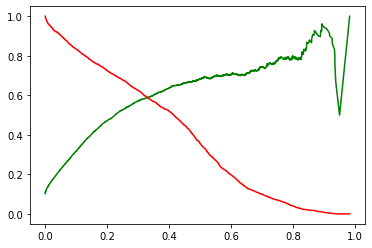

In [153]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [154]:
##Selecting 0.35 as p threshold. It can be selected lower if high recall and less precision needed

from sklearn import metrics
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.35 else 0)
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

# Let's check the overall f1 score.
print(metrics.f1_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

[[18108   809]
 [  924  1215]]
0.5837136680278646


### Feature Importance 

In [155]:
importance = res.params.drop(index='const')

arpu_6                                0.280515
onnet_mou_8                          -0.436569
std_og_t2m_mou_8                     -0.311208
total_og_mou_7                        0.204522
loc_ic_t2m_mou_7                      0.349821
total_ic_mou_8                       -2.423286
spl_ic_mou_8                         -0.461412
total_rech_num_8                     -0.475517
last_day_rch_amt_8                   -0.558873
max_rech_data_8                      -0.385034
count_rech_3g_8                      -0.257898
arpu_3g_8                             0.450095
aon                                  -0.345988
aug_vbc_3g                           -0.343421
diff_recharge_days_from_monthend_8    0.313904
dtype: float64


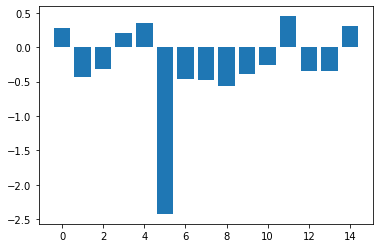

In [156]:
##reset
pd.set_option('display.max_rows', 20)
import matplotlib.pyplot as plt

print(importance)
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [157]:
importance.abs().sort_values(ascending=False)

total_ic_mou_8                        2.423286
last_day_rch_amt_8                    0.558873
total_rech_num_8                      0.475517
spl_ic_mou_8                          0.461412
arpu_3g_8                             0.450095
onnet_mou_8                           0.436569
max_rech_data_8                       0.385034
loc_ic_t2m_mou_7                      0.349821
aon                                   0.345988
aug_vbc_3g                            0.343421
diff_recharge_days_from_monthend_8    0.313904
std_og_t2m_mou_8                      0.311208
arpu_6                                0.280515
count_rech_3g_8                       0.257898
total_og_mou_7                        0.204522
dtype: float64

## Conclusion

- From prediction model, detection rate 0.8 was achieved for churners with random forest. Overall f1 score was 0.86. XGBoost gave 0.41 detection rate for churners so random forest classifier was finalized.
- From feature importance model(used logistic regression), below are business insights
    - arpu_3g_8 - higher data cost increases odds of churn so offer attractive data packs.
    - diff_recharge_days_from_monthend_8 - Recharge not done on time per habit in action month. Focus on such customers.
    - loc_ic_t2m_mou_7 - Avoid charging local incoming calls from other operator networks. Increase in loc_ic_t2m_mou_7 increases odds of Churn which may be due to charges applied/service health.
    - total_ic_mou_8 - Offer free incoming monthly usage which significantly reduces odds of churn.
    - last_day_rch_amt_8 - Provide attractive offers like free data if recharge done before expiry.
    - onnet_mou_8/std_og_t2m_mou_8 - Offer low cost ONNET MOU and STD calls to diff operator - encouraging higher usage and reducing odds of Churn.
